In [1]:
import sys
sys.path.append('..')  # Add parent folder to system path

import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
from Others import LoadData
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from Constants import *

from evaluate_clustering import evaluate_clusters, profiling_clustering_cats


In [2]:
cases = LoadData.load_cases("../../Data/cases.csv")

In [3]:
columns = ['Antiquity', 'Pages', 'Bestseller', 'Film', 'Saga', ]

In [4]:
# Extract numerical features for clustering
def get_variables(case):
    variables, genres = case.get_variables()
    return variables + genres
data = [get_variables(case) for case in cases]
# data = pd.DataFrame(data, columns=columns)
data = pd.DataFrame(data)

In [5]:
# Extract numerical features for clustering
data = [case.get_variables()[0] for case in cases]
data = pd.DataFrame(data, columns=['Antiquity', 'Pages', 'Bestseller', 'Film', 'Saga'])



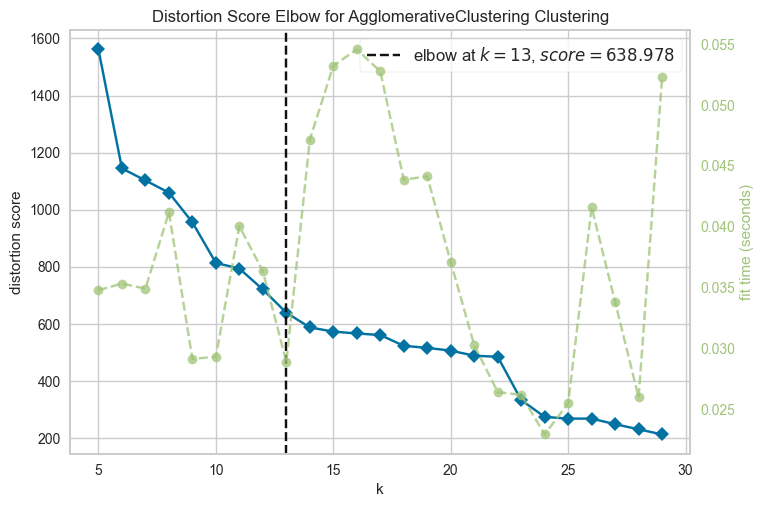

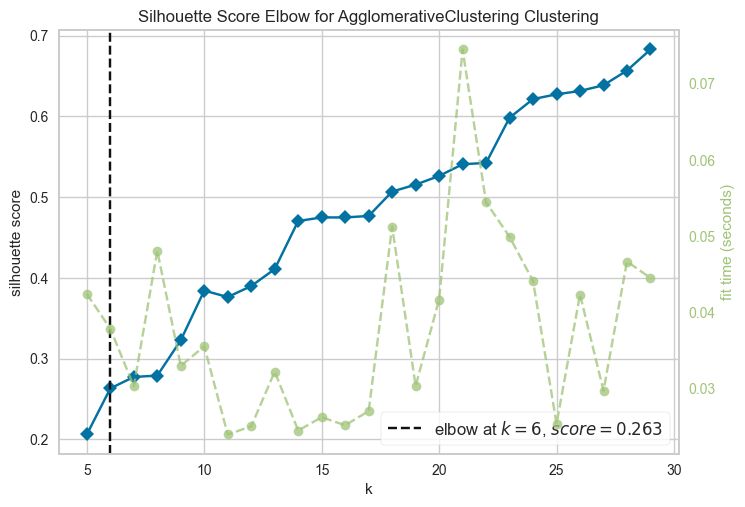

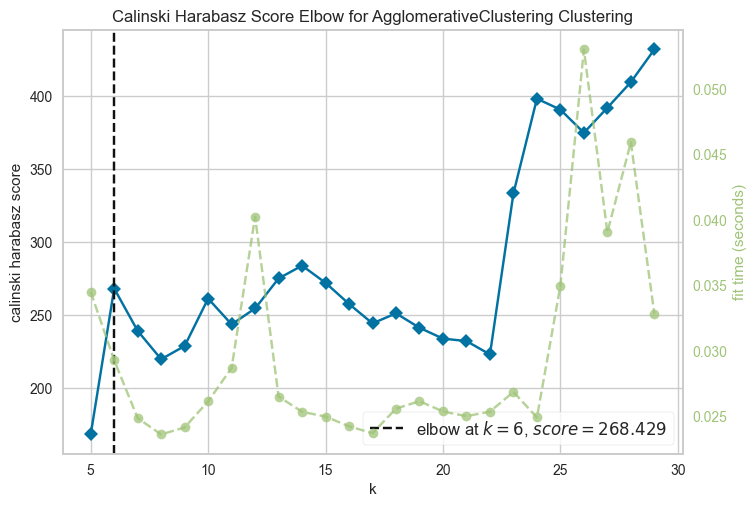

In [6]:
clustering = AgglomerativeClustering(affinity='jaccard', linkage='complete')


evaluate_clusters(data, clustering, k_range=range(5, 30))

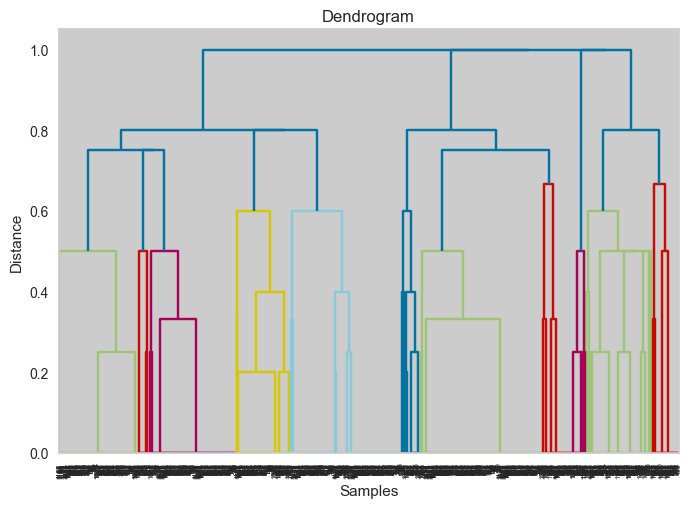

In [7]:
Z = linkage(data, method='complete', metric='jaccard')

# Plot the dendrogram
patata = dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


In [8]:
clustering = AgglomerativeClustering(n_clusters=25, affinity='jaccard', linkage='complete')
clusters = clustering.fit_predict(data)

# Add cluster information to Case objects
for i, case in enumerate(cases):
    case.cluster = clusters[i]

# Visualize the clustering
cluster_data = data.copy()
cluster_data["cluster"] = clusters

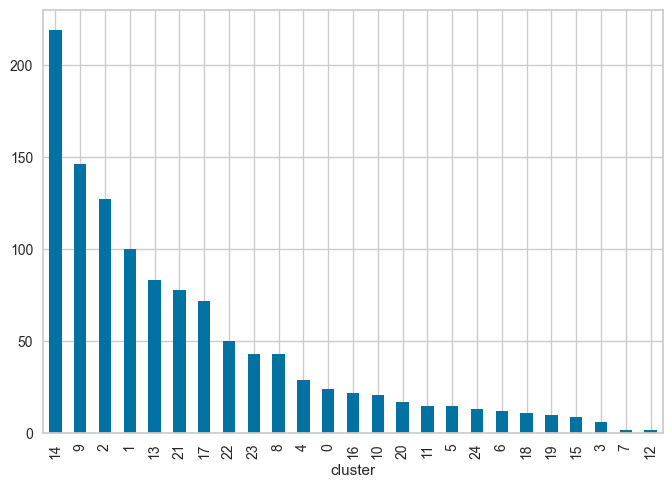

In [9]:
_ = cluster_data['cluster'].value_counts().plot(kind='bar')

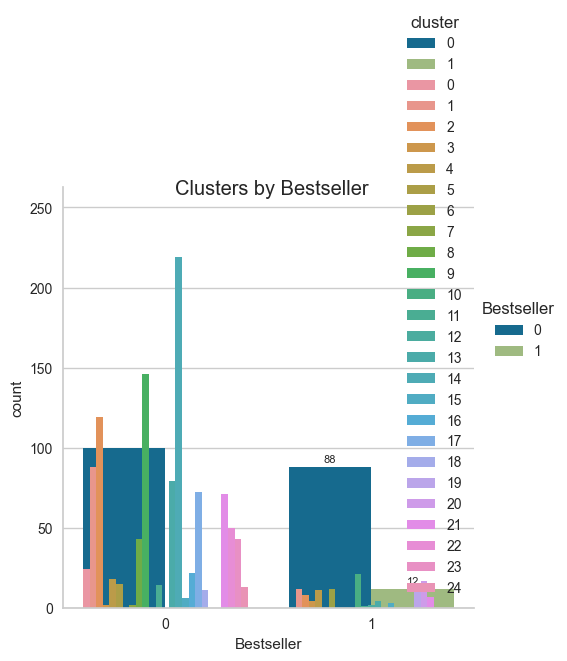

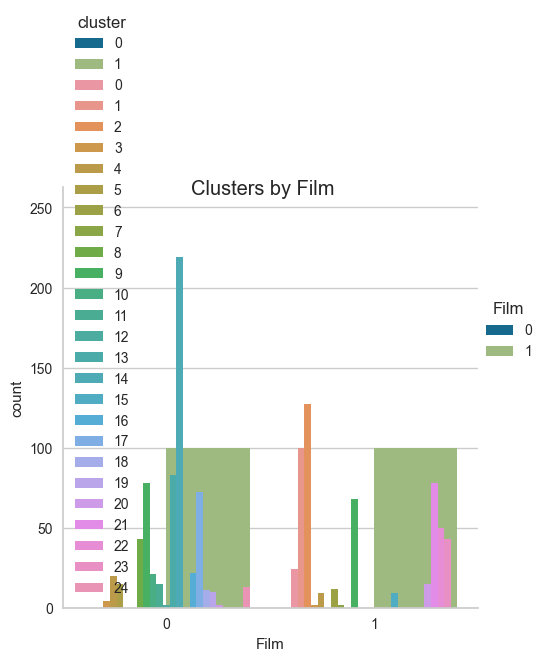

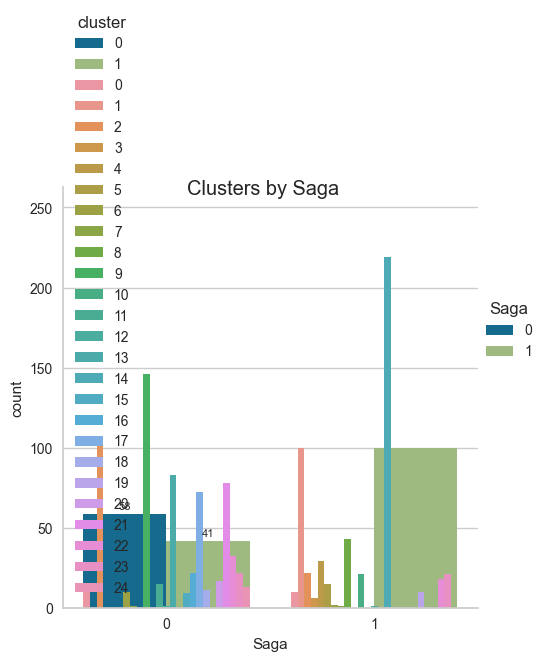

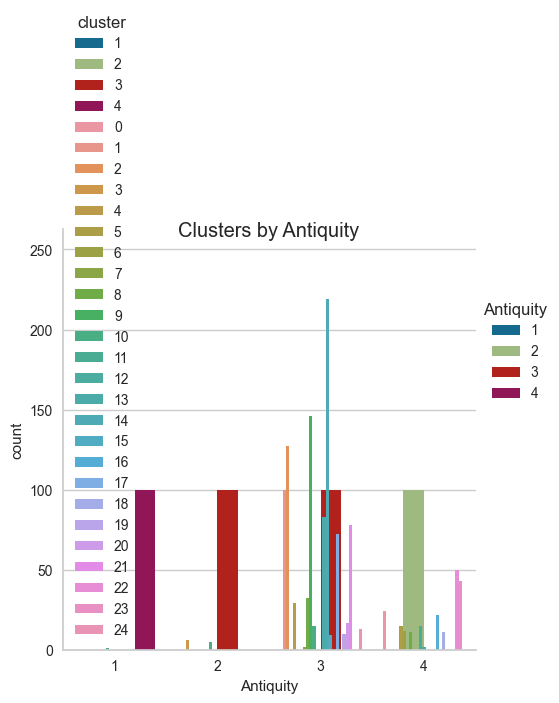

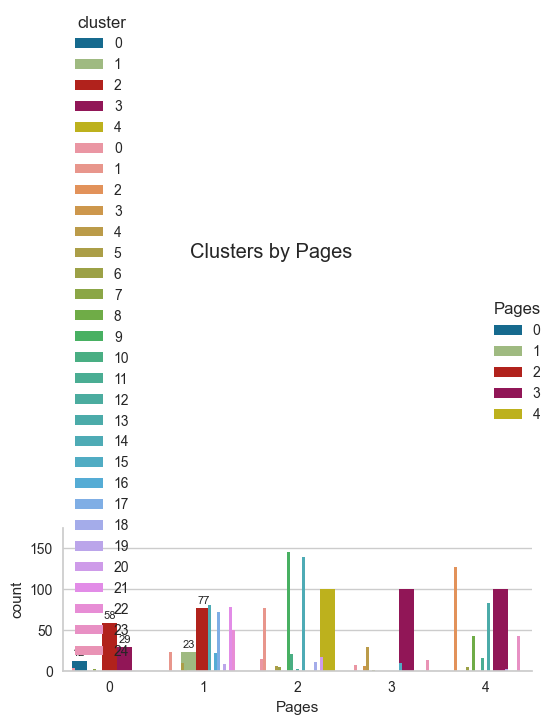

In [10]:
cat_vars = ["Bestseller", "Film", "Saga", "Antiquity", "Pages"]
profiling_clustering_cats(cluster_data, cat_vars)

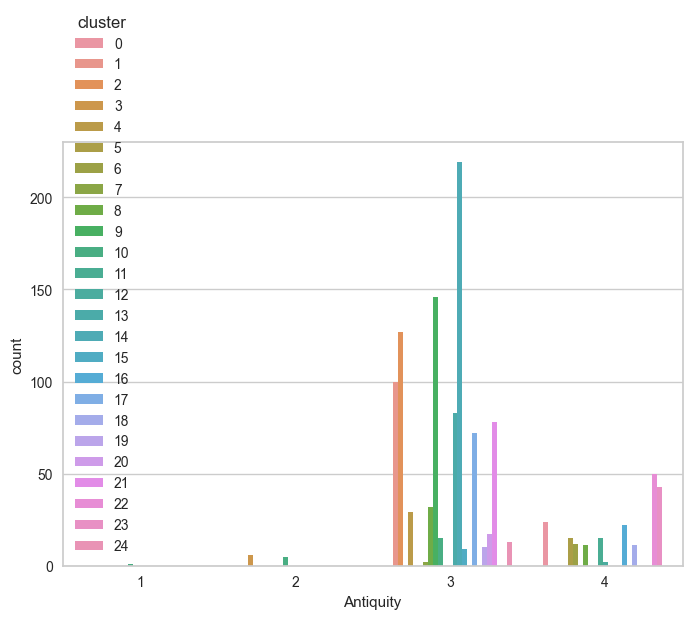

In [11]:
# Pairplot for visualizing clusters
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
# custom_palette = sns.color_palette("Set2", 10)
fg = sns.countplot(data=cluster_data, hue='cluster', x="Antiquity")

# for ax in fg.axes[0]:

#             # add annotations
#             for c in ax.containers:

#                 # custom label calculates percent and add an empty string so 0 value bars don't have a number
#                 labels = [f'{int(w):0}' if (w := v.get_height()) > 0 and w != 100 else '' for v in c]

#                 _ = ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, padding=2)
            
#             _ = ax.margins(y=0.2)
# plt.show()


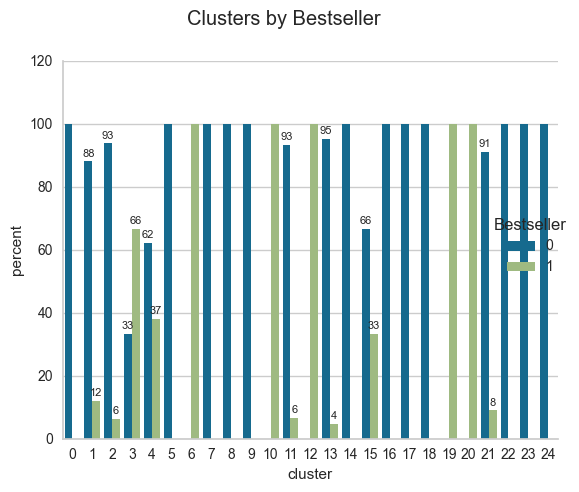

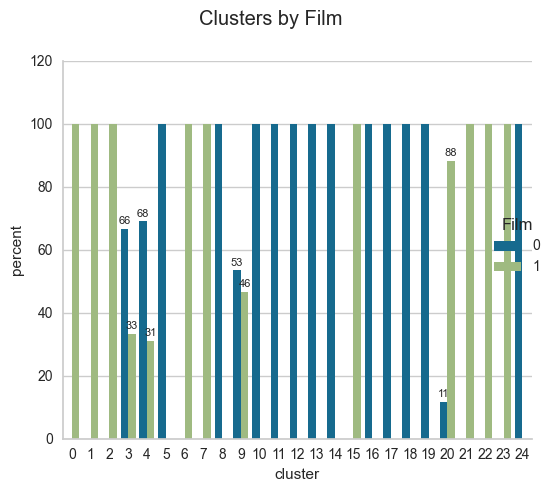

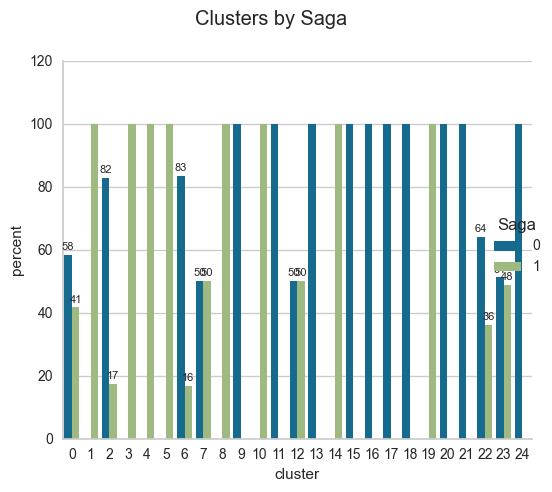

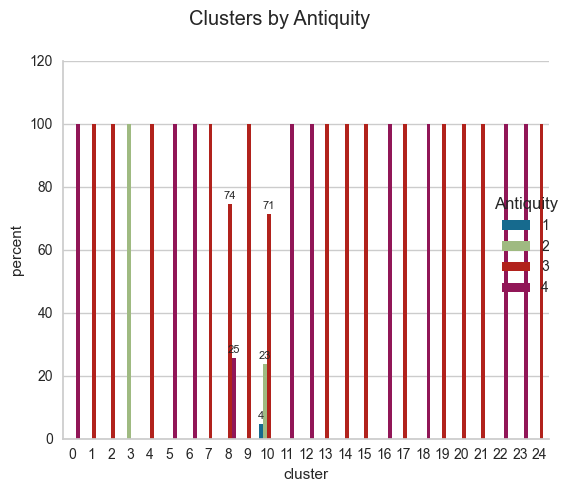

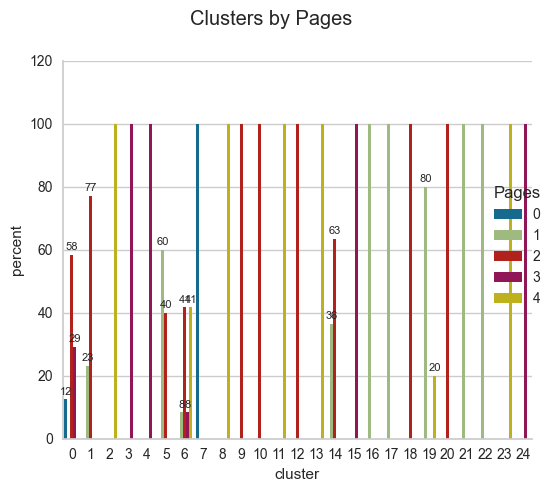

In [12]:
cluster_var = 'cluster'
data = cluster_data
cat_vars = ["Bestseller", "Film", "Saga", "Antiquity", "Pages"]

for i, cat_var in enumerate(cat_vars):  
    
    fg = (data
    .groupby(cluster_var)[cat_var]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x=cluster_var, y='percent', hue=cat_var, kind='bar'))

    fg.fig.suptitle(f'Clusters by {cat_var}')

    # _ = sns.countplot(data=data, x=cluster_var, hue=cat_var)

    for ax in fg.axes.ravel():

        # add annotations
        for c in ax.containers:

            # custom label calculates percent and add an empty string so 0 value bars don't have a number
            labels = [f'{int(w):0}' if (w := v.get_height()) > 0 and w != 100 else '' for v in c]

            _ = ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, padding=2)
        
        _ = ax.margins(y=0.2)

    _ = plt.tight_layout()
    _ = plt.show()

ValueError: Could not interpret input 'percent'

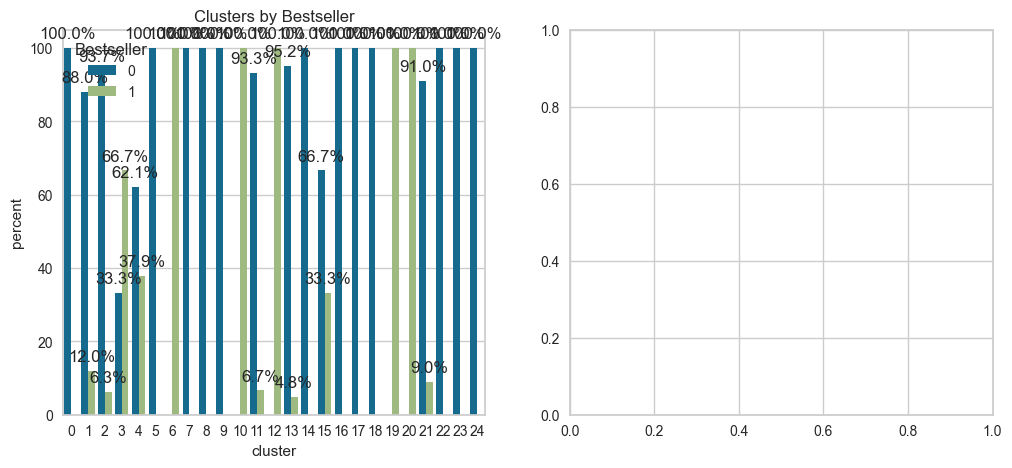

In [20]:
cat_vars = ["Bestseller", "Film", "Saga", "Antiquity", "Pages"]
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cat_vars is a list of categorical variables and cluster_var is the variable by which you are clustering
for i, cat_var in enumerate(cat_vars):
    # Create subplots with one row and two columns
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the first bar plot using sns.catplot
    fg = (data
          .groupby(cluster_var)[cat_var]
          .value_counts(normalize=True)
          .mul(100)
          .rename('percent')
          .reset_index()
          .pipe((sns.barplot, 'data'), x=cluster_var, y='percent', hue=cat_var, ax=axes[0]))
    
    fg.set_title(f'Clusters by {cat_var}')
    
    # Add annotations
    for p in fg.patches:
        fg.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Plot the second count plot using sns.countplot
    sns.barplot(data=data, hue=cluster_var, x=cat_var, y='percent', ax=axes[1])
    
    # Set title for the count plot
    axes[1].set_title(f'Count of {cat_var} by {cluster_var}')
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plots
    plt.show()


In [ ]:
case = case[0]
